# ADS - Network analysis module, homework 1

In [1]:
#!pip install pycombo

In [2]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf

Populating the interactive namespace from numpy and matplotlib


## Task 1. Analysis of Les Miserables network 

In [3]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
G = nx.read_gml('lesmis.gml') 

### Q1. Visualize the network below with node labes and sizes proportional to node degree

In [4]:
# g = nx.read_gml('lesmis.gml',label = 'id')
# nx.write_edgelist(g, 'task1.csv', delimiter=',')

In [5]:
# G_task1 = pd.read_csv('task1.csv',index_col = None, header = 0)
# G_task1.head()

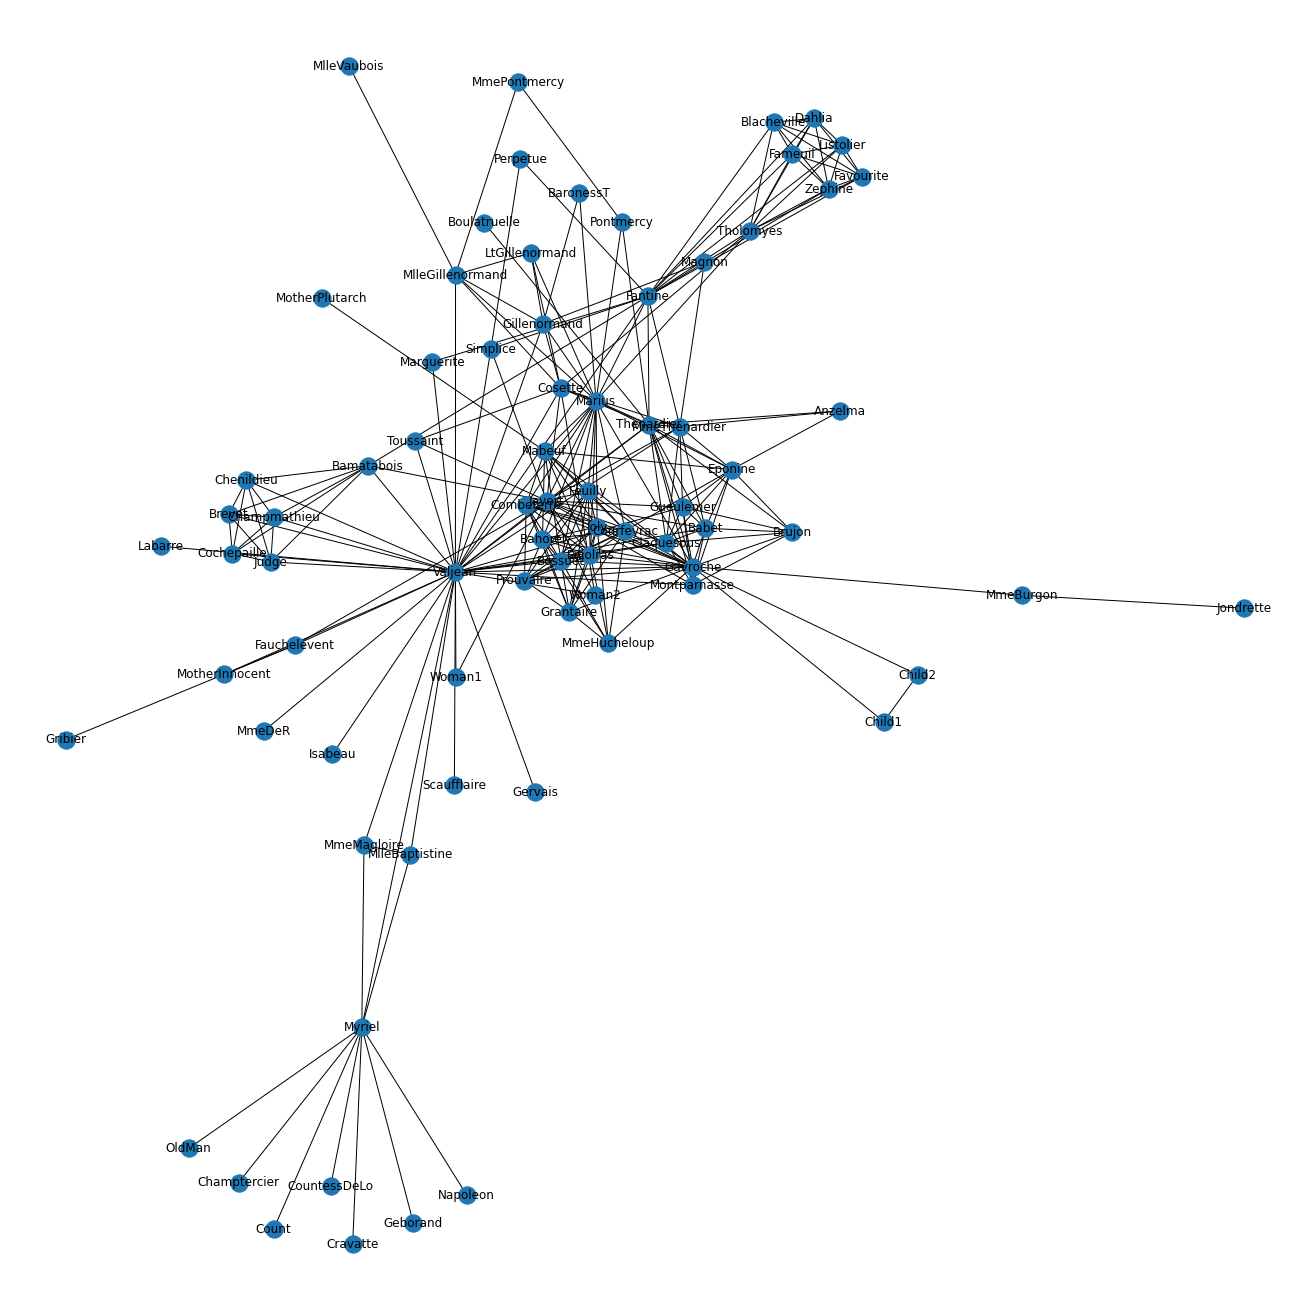

In [6]:
np.random.seed(111)
plt.figure(figsize = (18,18))
nx.draw(G, with_labels = True)

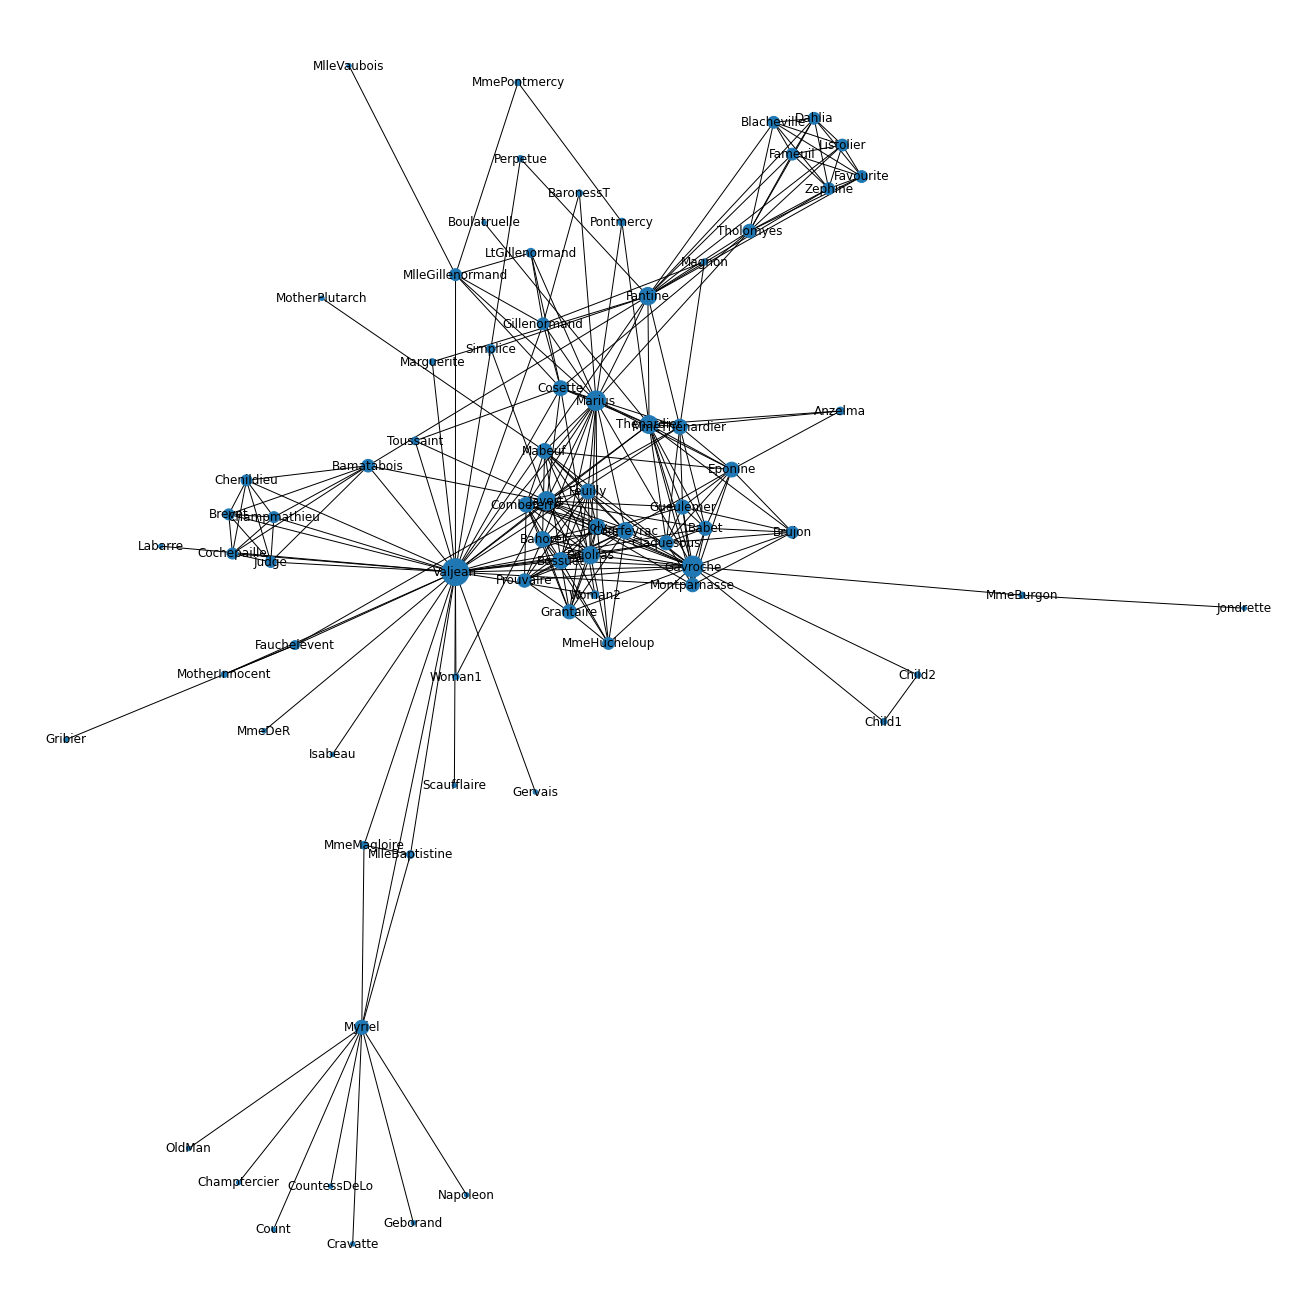

In [7]:
np.random.seed(111)
plt.figure(figsize = (18,18))
nx.draw(G, node_size = np.array(list(dict(G.degree()).values()))*20, with_labels = True)

### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

c) closeness centrality;

In [8]:
# print(G.nodes())
# print(G.edges())
# dict(G.degree())
# list(dict(G.degree()).keys())[0]

In [9]:
DEGREE_CENTRALITY = nx.degree_centrality(G)
CLOSENESS_CENTRALITY = nx.closeness_centrality(G)
BETWEENNESS_CENTRALITY = nx.betweenness_centrality(G)
import heapq
# print(DEGREE_CENTRALITY)
# print(CLOSENESS_CENTRALITY)
# print(BETWEENNESS_CENTRALITY)

In [10]:
# a)
# Top5degree = sorted(DEGREE_CENTRALITY.values(),reverse = True)[4]
# Top5degree_all = sorted(DEGREE_CENTRALITY.values(),reverse = True)[:5]
Top5degree_nodes = (heapq.nlargest(5, DEGREE_CENTRALITY.items(),key=lambda x:x[1]))
# print(Top5degree_nodes)
# print(Top5degree)
# print(Top5degree_all)
for i in range(5):
    print('Top {0} noed of degree centrality is: {1} with {2}'.format(i,Top5degree_nodes[i][0],Top5degree_nodes[i][1]))

Top 0 noed of degree centrality is: Valjean with 0.47368421052631576
Top 1 noed of degree centrality is: Gavroche with 0.2894736842105263
Top 2 noed of degree centrality is: Marius with 0.25
Top 3 noed of degree centrality is: Javert with 0.22368421052631576
Top 4 noed of degree centrality is: Thenardier with 0.21052631578947367


In [11]:
# b)
# Top5betweeness = sorted(BETWEENNESS_CENTRALITY.values(),reverse = True)[4]
# Top5betweeness_all = sorted(BETWEENNESS_CENTRALITY.values(),reverse = True)[:5]
Top5betweeness_nodes = (heapq.nlargest(5, BETWEENNESS_CENTRALITY.items(),key=lambda x:x[1]))
# print(Top5betweeness_nodes)
# print(Top5betweeness_all)
for i in range(5):
    print('Top {0} noed of betweeness centrality is: {1} with {2}'.format(i,Top5betweeness_nodes[i][0],Top5betweeness_nodes[i][1]))

Top 0 noed of betweeness centrality is: Valjean with 0.5699890527836184
Top 1 noed of betweeness centrality is: Myriel with 0.17684210526315788
Top 2 noed of betweeness centrality is: Gavroche with 0.16511250242584766
Top 3 noed of betweeness centrality is: Marius with 0.132032488621946
Top 4 noed of betweeness centrality is: Fantine with 0.12964454098819422


In [12]:
# c)
# Top5closeness = sorted(CLOSENESS_CENTRALITY.values(),reverse = True)[4]
# Top5closeness_all = sorted(CLOSENESS_CENTRALITY.values(),reverse = True)[:5]
Top5closeness_nodes = (heapq.nlargest(5, CLOSENESS_CENTRALITY.items(),key=lambda x:x[1]))
# print(Top5closeness_nodes)
# print(Top5closeness_all)
for i in range(5):
    print('Top {0} noed of closeness centrality is: {1} with {2}'.format(i+1,Top5closeness_nodes[i][0],Top5closeness_nodes[i][1]))

Top 1 noed of closeness centrality is: Valjean with 0.6440677966101694
Top 2 noed of closeness centrality is: Marius with 0.5314685314685315
Top 3 noed of closeness centrality is: Thenardier with 0.5170068027210885
Top 4 noed of closeness centrality is: Javert with 0.5170068027210885
Top 5 noed of closeness centrality is: Gavroche with 0.5135135135135135


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [13]:
list_alpha = [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]

In [14]:
list_pr = {}
for i in list_alpha:
    list_pr[i] = nx.pagerank(G, alpha = i)

In [15]:
list_Top5_nodes = {}
list_Top5 = {}
list_Top5_nodesname = {}
for i in list_alpha:
    list_Top5_nodes[i] = sorted(list_pr[i].values(), reverse = True)[4]
    list_Top5[i] = sorted(list_pr[i].values(), reverse = True)[:5]
#     list_Top5_nodesname = [d for d in G if list_pr[d] >= list_Top5_nodes]


In [16]:
#list_Top5_nodes[0.1]
for i in list_alpha:
    print(pd.DataFrame(heapq.nlargest(5, list_pr[i].items(),key=lambda x:x[1]),\
                       columns = ['{0}node'.format(i),'pagerank_centrality']))

   0.95node  pagerank_centrality
0   Valjean             0.074704
1  Gavroche             0.039553
2    Marius             0.034302
3    Myriel             0.033461
4    Javert             0.032396
    0.9node  pagerank_centrality
0   Valjean             0.075701
1    Myriel             0.039655
2  Gavroche             0.037390
3    Marius             0.032384
4    Javert             0.031346
   0.85node  pagerank_centrality
0   Valjean             0.075434
1    Myriel             0.042803
2  Gavroche             0.035764
3    Marius             0.030893
4    Javert             0.030303
    0.8node  pagerank_centrality
0   Valjean             0.074422
1    Myriel             0.044341
2  Gavroche             0.034357
3    Marius             0.029598
4    Javert             0.029264
    0.7node  pagerank_centrality
0   Valjean             0.070953
1    Myriel             0.044898
2  Gavroche             0.031768
3    Marius             0.027267
4    Javert             0.027205
    0.6nod

In [17]:
a = {}
for i in list_alpha:
    a[i] = pd.DataFrame(heapq.nlargest(5, list_pr[i].items(),key=lambda x:x[1]),\
                                           columns = ['{0}node'.format(i),'pagerank_centrality'])
    a[i]['std'] = np.std(a[i]['pagerank_centrality'])

In [18]:
b = {}
for i in list_alpha:
    b[i] = a[i]['std'][0]
b

{0.95: 0.01610013373739199,
 0.9: 0.01649312498906253,
 0.85: 0.01680563774790333,
 0.8: 0.01691331836584997,
 0.7: 0.016581856913055165,
 0.6: 0.015667561477079976,
 0.5: 0.014264808920455277,
 0.4: 0.012407696326777302,
 0.3: 0.01006070836522886,
 0.2: 0.007236792879787099,
 0.1: 0.003906303187271907}

In [19]:
# The interval for the ranking remains mostly stable is [0.7,0.9]

### Q4. Partition the network using any available algorithm of your choice (e.g. Combo), report network partition modularity score and visualize the partition (different communities with different colors)

In [20]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
from scipy import optimize
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.formula.api as smf
import os
from networkx.algorithms import community
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [21]:
PCG, PCG_mod = pycombo.execute(G, max_communities = 0) #combo partition
PCG_mod

0.560008370016743

In [22]:
def modularity(G, partition, correctLoops = False): #modularity of the networkx graph given partition dictionary; correctLoop - special flag to account for inconsistency in loop edge definition in some graphs
    A = np.array(nx.adjacency_matrix(G).todense(), dtype = float)
    if correctLoops and not isinstance(G,nx.DiGraph):
        A += np.diag(np.diag(A))
    wout = A.sum(axis=1)
    win = A.sum(axis=0)
    T = wout.sum()
    Q = A / T - np.matmul(wout.reshape(-1, 1), win.reshape(1, -1)) / (T ** 2)
    C = np.array([partition[n] for n in G.nodes()]) #could there be an indexing mismatch between Q and C
    return (Q * (C.reshape(-1,1) == C.reshape(1,-1))).sum()

In [23]:
print('G partitioning Modularity={0}'.format(modularity(G,PCG)))

G partitioning Modularity=0.56000837001674


In [24]:
def sets2dictPartition(spart): #convert list of partitions to dictionary
    part={}
    c=1
    for cset in spart:
        cpart={n:c for n in cset}
        part.update(cpart)
        c+=1
    return part    

In [25]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    plt.figure(figsize = (18,18))
    nx.draw(G,pos=pos,with_labels= True,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

<Figure size 576x576 with 0 Axes>

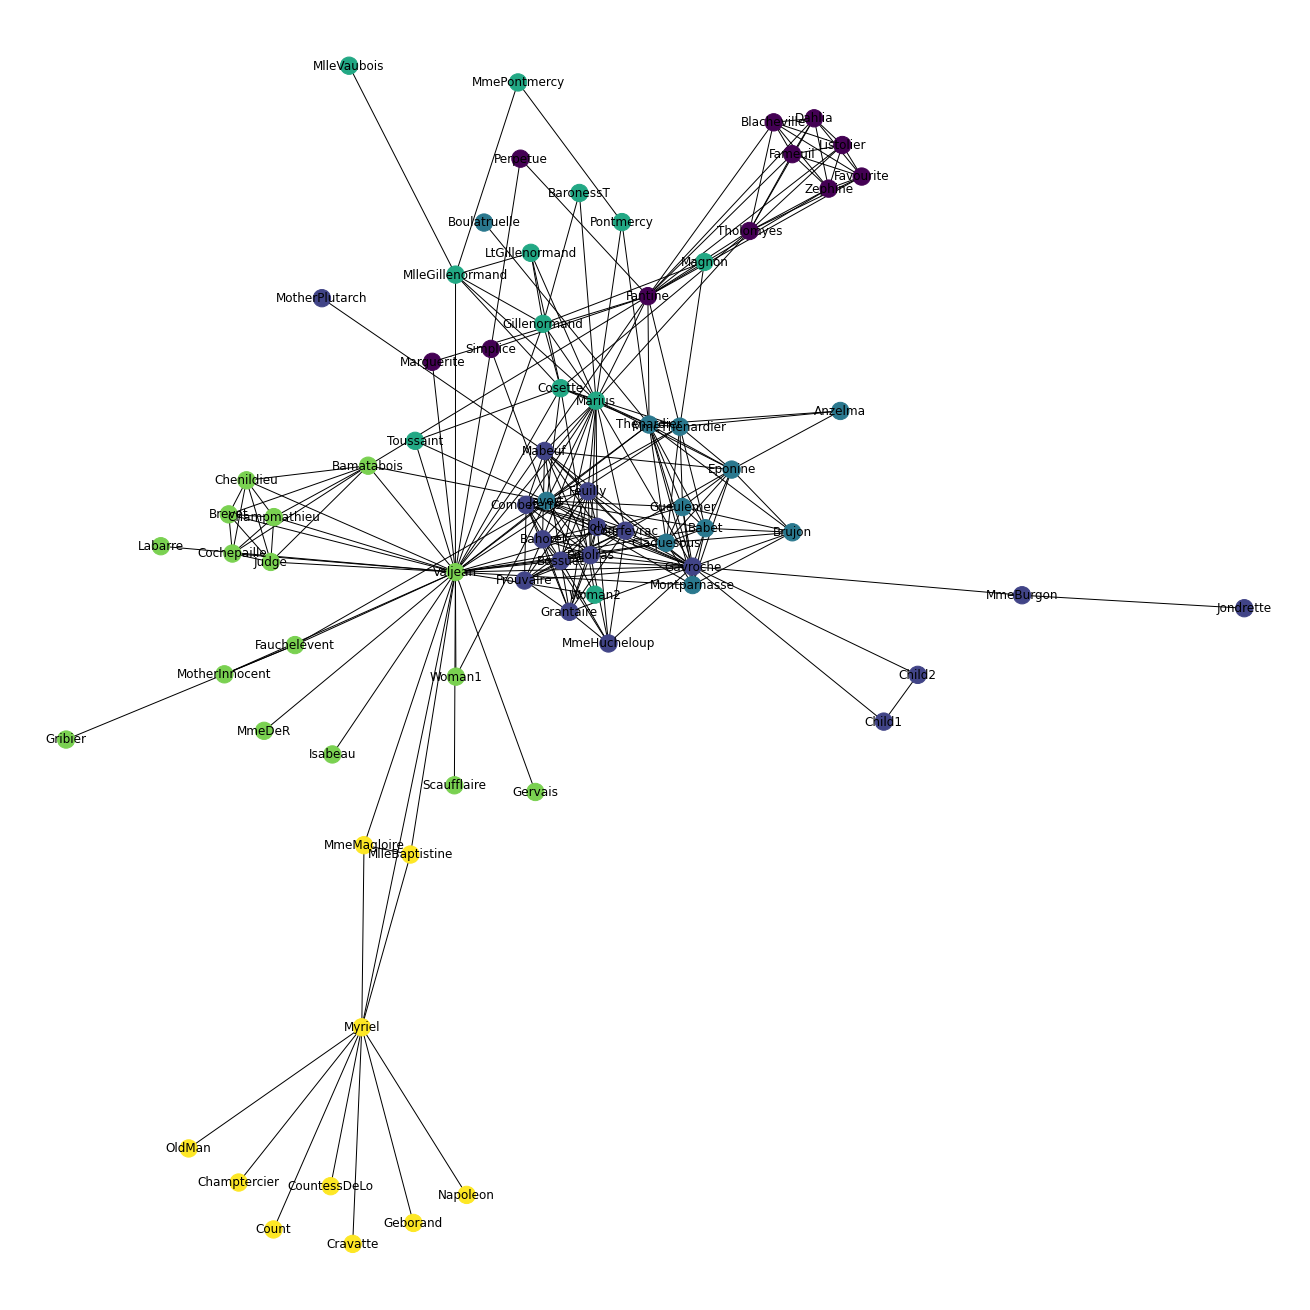

In [26]:
np.random.seed(111)
visualizePartition(G,PCG,None)

## Task 2 (World airports). 
### Q1. 
Find connected components, report their number and the sizes.  

### Q2. 
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

### Q3. 
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4. 
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$)

### Q5.
Partition the network using Combo algorithm, visualize the partition 


In [27]:
cities = pd.read_csv('citiesTable.csv', index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [28]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [29]:
#now read the links
links = pd.read_csv('citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [30]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [31]:
#add edges to the network
Flights.add_edges_from(edgelist)

In [32]:
# Q1
nx.number_connected_components(Flights)

4

In [33]:
CC=sorted(nx.connected_components(Flights), key=len, reverse=True)
for i in CC:
    print(len(i))

2981
3
2
2


In [34]:
# Q2

In [35]:
CC[0]

{'Ovda',
 'Minacu',
 'Healy',
 'Shaktoolik',
 'Kerkyra/corfu',
 'Kendari',
 'Sundsvall',
 'Tuguegarao',
 'Amarillo',
 'Pietersburg',
 'Matsumoto',
 'La Paz',
 'Kone',
 'North Bend',
 'Rimini',
 'Toledo',
 'Kulu',
 'Elista',
 'Mitiaro Island',
 'Jinzhou',
 'Enshi',
 'Wellington',
 'Sao Tome',
 'Kapuskasing',
 'Nevsehir',
 'Haines',
 'Kalkmar',
 'Doncaster,Sheffield',
 'Humaita',
 'Clyde River',
 'Entebbe',
 'Heihe',
 'Montes Claros',
 'Uummannaq',
 'Kanpur',
 'Trabzon',
 'Alice Town',
 'Humberside',
 'Tegucigalpa',
 'Bandar Lampung-Sumatra Island',
 'Guanambi',
 'Guwahati',
 'Yola',
 'Kos',
 'Bulawayo',
 'Tachina',
 'Bharatpur',
 'Basrah',
 'Rumjatar',
 'Fort Saint John',
 'Sukkur',
 'Hay River',
 'Bario',
 'Akron',
 'Port Williams',
 'Saipan',
 'Corpus Christi',
 'Killeen',
 'Cairns',
 'San Luis Potosi',
 'Blackall',
 'Kandahar',
 'Havana',
 'Sogndal',
 'La Coruna',
 'San Antonio',
 'San Juan',
 'Cotabato',
 'Tachilek',
 'Batumi',
 'Belize',
 'Tasiujaq',
 'Pantelleria',
 'Nuevo Laredo'

In [36]:
len(CC[0])

2981

In [37]:
sub = Flights.subgraph(CC[0])

sub_DEGREE_CENTRALITY = nx.degree_centrality(sub)
sub_BETWEENNESS_CENTRALITY = nx.betweenness_centrality(sub)
sub_CLOSENESS_CENTRALITY = nx.closeness_centrality(sub)

In [38]:
# DEGREE_CENTRALITY)
Top10degree_nodes = (heapq.nlargest(10, sub_DEGREE_CENTRALITY.items(),key=lambda x:x[1]))
for i in range(10):
    print('Top {0} noed of degree centrality is: {1} with {2}'.format(i+1,Top10degree_nodes[i][0],Top10degree_nodes[i][1]))

Top 1 noed of degree centrality is: London with 0.10436241610738255
Top 2 noed of degree centrality is: Paris with 0.08959731543624161
Top 3 noed of degree centrality is: Frankfurt with 0.07785234899328859
Top 4 noed of degree centrality is: Moscow with 0.07684563758389261
Top 5 noed of degree centrality is: Amsterdam with 0.0697986577181208
Top 6 noed of degree centrality is: Atlanta with 0.0697986577181208
Top 7 noed of degree centrality is: Chicago with 0.06677852348993288
Top 8 noed of degree centrality is: Beijing with 0.06174496644295302
Top 9 noed of degree centrality is: Istanbul with 0.060738255033557044
Top 10 noed of degree centrality is: Dallas-fort Worth with 0.060738255033557044


In [39]:
# BETWEENNESS_CENTRALITY)
Top10betweeness_nodes = (heapq.nlargest(10, sub_BETWEENNESS_CENTRALITY.items(),key=lambda x:x[1]))
for i in range(10):
    print('Top {0} noed of betweenness centrality is: {1} with {2}'.format(i+1,Top10betweeness_nodes[i][0],Top10betweeness_nodes[i][1]))

Top 1 noed of betweenness centrality is: London with 0.09076727836638496
Top 2 noed of betweenness centrality is: Anchorage with 0.08216371312591912
Top 3 noed of betweenness centrality is: Paris with 0.07784192121669775
Top 4 noed of betweenness centrality is: Moscow with 0.061038019702898835
Top 5 noed of betweenness centrality is: Chicago with 0.05813492835186721
Top 6 noed of betweenness centrality is: Frankfurt with 0.05452341641775677
Top 7 noed of betweenness centrality is: Seattle with 0.052719585605351275
Top 8 noed of betweenness centrality is: Dubai with 0.04644272199874113
Top 9 noed of betweenness centrality is: Tokyo with 0.0458546447882062
Top 10 noed of betweenness centrality is: Toronto with 0.04531466582661801


In [40]:
# CLOSENESS_CENTRALITY)
Top10closeness_nodes = (heapq.nlargest(10, sub_CLOSENESS_CENTRALITY.items(),key=lambda x:x[1]))
for i in range(10):
    print('Top {0} noed of closeness centrality is: {1} with {2}'.format(i+1,Top10closeness_nodes[i][0],Top10closeness_nodes[i][1]))

Top 1 noed of closeness centrality is: London with 0.42335559028271064
Top 2 noed of closeness centrality is: Frankfurt with 0.4174838890445503
Top 3 noed of closeness centrality is: Paris with 0.41637557635880956
Top 4 noed of closeness centrality is: Amsterdam with 0.4094531464688101
Top 5 noed of closeness centrality is: New York with 0.40053763440860213
Top 6 noed of closeness centrality is: Toronto with 0.39632929910892406
Top 7 noed of closeness centrality is: Los Angeles with 0.39601328903654487
Top 8 noed of closeness centrality is: Chicago with 0.3927253558249868
Top 9 noed of closeness centrality is: Dubai with 0.3926218708827404
Top 10 noed of closeness centrality is: Newark with 0.38964435146443516


In [41]:
sub_pr = nx.pagerank(G, alpha = 0.85)
top10 = (heapq.nlargest(10, sub_pr.items(),key=lambda x:x[1]))
for i in range(10):
    print('Top {0} noed of pagerank centrality is: {1} with {2}'.format(i+1,top10[i][0],top10[i][1]))

Top 1 noed of pagerank centrality is: Valjean with 0.07543374445332472
Top 2 noed of pagerank centrality is: Myriel with 0.042803439760757324
Top 3 noed of pagerank centrality is: Gavroche with 0.035764123431619346
Top 4 noed of pagerank centrality is: Marius with 0.03089270192040647
Top 5 noed of pagerank centrality is: Javert with 0.030302597127170365
Top 6 noed of pagerank centrality is: Thenardier with 0.027925725316528028
Top 7 noed of pagerank centrality is: Fantine with 0.02702247422141941
Top 8 noed of pagerank centrality is: Enjolras with 0.021879692835635848
Top 9 noed of pagerank centrality is: Cosette with 0.0206109951184114
Top 10 noed of pagerank centrality is: MmeThenardier with 0.019500856219565186


In [42]:
# Q3

In [43]:
path1=nx.shortest_path(sub)

In [44]:
nx.average_shortest_path_length(sub)

3.939842942663716

In [45]:
CityPos={c:(cities['long. most active airport'][c],cities['lat. most active airport'][c])
         for c in cities.index}

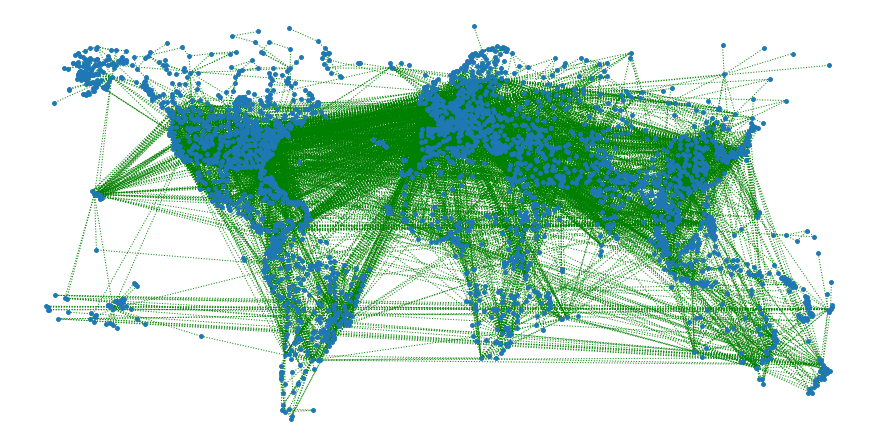

In [46]:
plt.figure(figsize = (12,6))
nx.draw(sub,pos=CityPos,with_labels=False,node_size=15,style='dotted',edge_color='green')

In [47]:
len(path1)

2981

In [48]:
allpaths=dict(nx.shortest_path_length(sub))
# allpathsD=dict(nx.shortest_path_length(sub,weight='dist'))

In [49]:
diameter=0; i0=0; j0=0;
for i in allpaths.items():
  for j in i[1].items():
    if j[1]>diameter:
      diameter=j[1]
      i0=i[0]
      j0=j[0]  
print('{0} - {1} : {2}'.format(i0,j0,diameter))

Peawanuck - Port Hope Simpson : 12


In [50]:
# visualize the shortest path of the maximum length
def visualize_path(path):
    plt.figure(figsize = (20,10))
    nx.draw_networkx_nodes(sub,pos=CityPos,node_size=10)
    x=[CityPos[v][0] for v in path]
    y=[CityPos[v][1] for v in path]
    plt.plot(x,y,'ro-')
    plt.plot([x[0],x[-1]],[y[0],y[-1]],'bs',markersize=11)

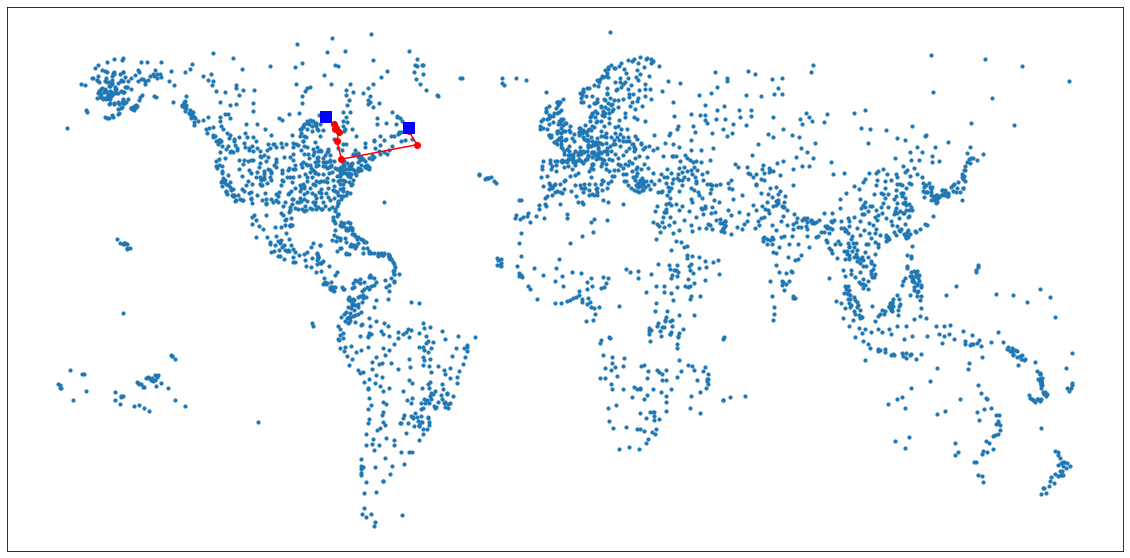

In [51]:
maximum = nx.shortest_path(sub,i0,j0)
visualize_path(maximum)

In [52]:
# Q4

In [53]:
PCsub, PCsub_mod = pycombo.execute(sub, max_communities = 0) #combo partition
PCsub_mod

0.6604649860532411

In [54]:
#visualize network partitioning given node locations pos
def visualizePartition(G,partition,pos):
    N=len(G.nodes())
    s=4+4*int(log10(N))
    plt.figure(figsize=(s,s))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
    c=[]
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    plt.figure(figsize = (20,10))
    nx.draw_networkx_nodes(G,pos=CityPos,node_size=15,node_color=c)

<Figure size 1152x1152 with 0 Axes>

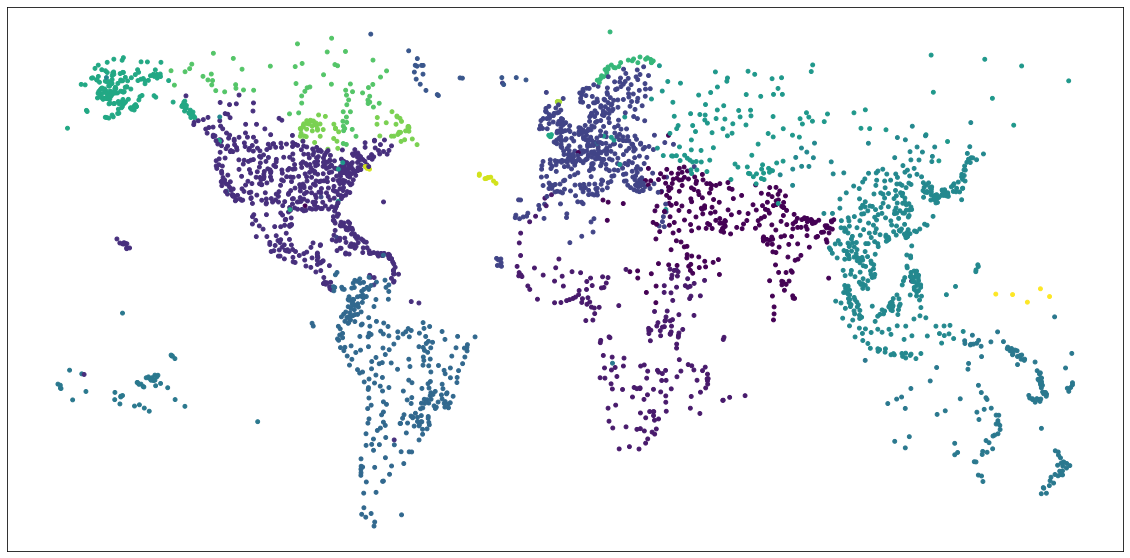

In [55]:
visualizePartition(sub,PCsub,None)

# Extracredit task 3. Compare weekend and weekday partitions of the taxi network

download ridership data from:https://drive.google.com/drive/folders/198aY_OAeRWWV4odEyB5_iCUog0p5vYnm?usp=sharing

## Q1. 
Aggregate provided daily taxi ridership into a) all weekend and b) all weekday ridership over the year

## Q2. 
Fit a gravity model $$ridership(o,d)\sim k\cdot pop(o) pop(d) travelime(o,d)^{-q}$$ to both networks, compare exponents (use log-scale linear regression with a slope coefficient $-q$ and intercent $\ln(k)$), replace zero ridership edges with a small number $1e-3$ for logarithm feasibility)

## Q3. 
Partition both networks using Combo algorithm, visualize and compare partitions

In [56]:
# Q1

In [57]:
import dask.dataframe as dd
# ridership = pd.read_csv('ridership.csv')
ridership = pd.read_csv('ridership.csv')
ridership.head()

,Date,PULocationID,DOLocationID,vehicle_count
0,2019-09-01,114,237,56
1,2019-09-01,74,7,97
2,2019-09-01,48,230,366
3,2019-09-01,33,226,14
4,2019-09-01,198,256,119


In [58]:
ridership['Date'] = pd.to_datetime(ridership['Date'])
ridership['DOW'] = ridership['Date'].dt.dayofweek
# ridership.head()
ridership.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13064062 entries, 0 to 13064061
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   Date           datetime64[ns]
 1   PULocationID   int64         
 2   DOLocationID   int64         
 3   vehicle_count  int64         
 4   DOW            int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 498.4 MB


In [59]:
weekend = ridership.loc[ridership['DOW'].isin([5,6])].reset_index().drop(['index'],axis = 1)
# weekend
weekend['DOW'].unique()

array([6, 5])

In [60]:
weekday = ridership.loc[ridership['DOW'].isin([0,1,2,3,4])].reset_index().drop(['index'],axis = 1)
weekday['DOW'].unique()

array([0, 1, 2, 3, 4])

In [61]:
weekend_nodate = weekend.groupby(by = ['PULocationID','DOLocationID']).sum()\
.drop(['DOW'],axis = 1)\
.reset_index()

weekend_nodate

,PULocationID,DOLocationID,vehicle_count
0,0,0,26
1,1,1,2137
2,1,3,1
3,1,4,51
4,1,5,13
...,...,...,...
64527,265,261,28
64528,265,262,43
64529,265,263,60
64530,265,264,443


In [62]:
weekday_nodate = weekday.groupby(by = ['PULocationID','DOLocationID']).sum()\
.drop(['DOW'],axis = 1)\
.reset_index()

weekday_nodate

,PULocationID,DOLocationID,vehicle_count
0,0,0,189
1,1,1,5268
2,1,4,96
3,1,5,44
4,1,6,13
...,...,...,...
65329,265,261,163
65330,265,262,143
65331,265,263,160
65332,265,264,2030


In [63]:
# Q2

In [64]:
weekend_nodate.loc[(weekend_nodate['vehicle_count'] == 0), 'vehicle_count'] == 0.001
weekday_nodate.loc[(weekday_nodate['vehicle_count'] == 0), 'vehicle_count'] == 0.001

Series([], Name: vehicle_count, dtype: bool)

In [65]:
duration = pd.read_csv('taxiZones_tripduration.csv')
duration.rename(columns={'PULocationID':'PUL', 'DOLocationID':'DOL'}, inplace=True)
duration.head()

,PUL,DOL,duration
0,1,1,457.029586
1,1,24,2772.000000
2,1,40,2665.000000
3,1,45,2013.000000
4,1,48,4525.000000


In [66]:
taxi_pop = pd.read_csv('taxi_zone_pop.csv')
taxi_pop.head()

,location_id,Population
0,2,1785
1,8,1785
2,93,1785
3,96,1785
4,207,1785


In [67]:
weekend_1 = weekend_nodate.merge(duration, left_on=['PULocationID', 'DOLocationID'], right_on=['PUL', 'DOL'])
weekday_1 = weekday_nodate.merge(duration, left_on=['PULocationID', 'DOLocationID'], right_on=['PUL', 'DOL'])

In [68]:
weekend_2 = weekend_1\
.merge(taxi_pop, left_on=['PULocationID'], right_on=['location_id'])\
.drop(['PUL','DOL'],axis = 1)

weekend_p_pop = weekend_2.rename(columns = {'Population':'PUpop'})

In [69]:
weekend_p_pop

,PULocationID,DOLocationID,vehicle_count,duration,location_id,PUpop
0,2,30,2,20.000000,2,1785
1,2,61,1,2340.000000,2,1785
2,3,3,8312,467.000000,3,28510
3,3,31,719,920.500000,3,28510
4,3,32,7199,426.000000,3,28510
...,...,...,...,...,...,...
25679,263,261,1556,1742.500000,263,76768
25680,263,262,28572,303.902453,263,76768
25681,263,263,39391,288.546590,263,76768
25682,263,264,16,758.961538,263,76768


In [70]:
weekend_3 = weekend_p_pop\
.merge(taxi_pop, left_on=['DOLocationID'], right_on=['location_id'])

weekend_pop = weekend_3.rename(columns = {'Population':'DOpop'})

In [71]:
weekend_pop.head()

,PULocationID,DOLocationID,vehicle_count,duration,location_id_x,PUpop,location_id_y,DOpop
0,2,30,2,20.000000,2,1785,30,26711
1,48,30,14,3994.000000,48,40595,30,26711
2,117,30,906,205.000000,117,31645,30,26711
3,132,30,142,1740.076923,132,0,30,26711
4,138,30,16,2123.000000,138,0,30,26711


In [72]:
weekend_all = weekend_pop.drop(['location_id_x','location_id_y'],axis =1)
weekend_all

,PULocationID,DOLocationID,vehicle_count,duration,PUpop,DOpop
0,2,30,2,20.000000,1785,26711
1,48,30,14,3994.000000,40595,26711
2,117,30,906,205.000000,31645,26711
3,132,30,142,1740.076923,0,26711
4,138,30,16,2123.000000,0,26711
...,...,...,...,...,...,...
25280,263,58,106,1647.666667,76768,27140
25281,88,99,3,2341.000000,20088,39309
25282,132,99,6,3002.000000,0,39309
25283,230,99,2,2895.000000,25807,39309


In [73]:
weekday_2 = weekday_1\
.merge(taxi_pop, left_on=['PULocationID'], right_on=['location_id'])\
.drop(['PUL','DOL'],axis = 1)

weekday_p_pop = weekday_2.rename(columns = {'Population':'PUpop'})

weekday_3 = weekday_p_pop\
.merge(taxi_pop, left_on=['DOLocationID'], right_on=['location_id'])

weekday_pop = weekday_3.rename(columns = {'Population':'DOpop'})

In [74]:
weekday_pop.head()

,PULocationID,DOLocationID,vehicle_count,duration,location_id_x,PUpop,location_id_y,DOpop
0,2,30,6,20.000000,2,1785,30,26711
1,48,30,22,3994.000000,48,40595,30,26711
2,117,30,1170,205.000000,117,31645,30,26711
3,122,30,4,1539.000000,122,20747,30,26711
4,132,30,372,1740.076923,132,0,30,26711


In [75]:
weekday_all = weekday_pop.drop(['location_id_x','location_id_y'],axis =1)
weekday_all

,PULocationID,DOLocationID,vehicle_count,duration,PUpop,DOpop
0,2,30,6,20.000000,1785,26711
1,48,30,22,3994.000000,40595,26711
2,117,30,1170,205.000000,31645,26711
3,122,30,4,1539.000000,20747,26711
4,132,30,372,1740.076923,0,26711
...,...,...,...,...,...,...
25286,263,58,174,1647.666667,76768,27140
25287,88,99,8,2341.000000,20088,39309
25288,132,99,12,3002.000000,0,39309
25289,230,99,6,2895.000000,25807,39309


In [76]:
weekday_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25291 entries, 0 to 25290
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PULocationID   25291 non-null  int64  
 1   DOLocationID   25291 non-null  int64  
 2   vehicle_count  25291 non-null  int64  
 3   duration       25291 non-null  float64
 4   PUpop          25291 non-null  int64  
 5   DOpop          25291 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1.4 MB


In [77]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import scipy.stats as stats
import networkx as nx  # for network analysis
import pycombo  # for community detection 
import geopandas as gpd
import shapely

In [118]:
def gravity(T_i, T_j, C_ij, mob_gt):
    
    X = sm.add_constant(np.log(C_ij))
    y = np.log(mob_gt) - np.log(T_i) - np.log(T_j)
    
    model = sm.OLS(y, X).fit()
    
    return model

In [119]:
model_weekend = gravity(weekend_all.PUpop, weekend_all.DOpop,weekend_all.duration, weekend_all.vehicle_count)
model_weekend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2625.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        22:16:58   Log-Likelihood:                -61886.
No. Observations:               25285   AIC:                         1.238e+05
Df Residuals:                   25283   BIC:                         1.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2440      0.211    -15.379      0.000      -3.657      -2.831
duration      -1.4722      0.029    -51.232      0.000      -1.529      -1.416
==============================================================================
Omnibus:                    15451.847   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157705.203
Skew:                           2.855   Prob(JB):                         0.00
Kurtosis:                      13.820   Cond. No.                         89.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
weekend_all.loc[(weekend_all['PUpop'] == 0), 'PUpop'] = 1 
weekend_all.loc[(weekend_all['DOpop'] == 0), 'DOpop'] = 1 

weekday_all.loc[(weekday_all['PUpop'] == 0), 'PUpop'] = 1 
weekday_all.loc[(weekday_all['DOpop'] == 0), 'DOpop'] = 1 

In [80]:
model_weekend = gravity(weekend_all.PUpop, weekend_all.DOpop,weekend_all.duration, weekend_all.vehicle_count)
model_weekend.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2625.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:18:11   Log-Likelihood:                -61886.
No. Observations:               25285   AIC:                         1.238e+05
Df Residuals:                   25283   BIC:                         1.238e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2440      0.211    -15.379      0.000      -3.657      -2.831
duration      -1.4722      0.029    -51.232      0.000      -1.529      -1.416
==============================================================================
Omnibus:                    15451.847   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           157705.203
Skew:                           2.855   Prob(JB):                         0.00
Kurtosis:                      13.820   Cond. No.                         89.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
model_weekday = gravity(weekday_all.PUpop, weekday_all.DOpop, weekday_all.duration, weekday_all.vehicle_count)
model_weekday.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     2638.
Date:                Fri, 22 Apr 2022   Prob (F-statistic):               0.00
Time:                        21:18:11   Log-Likelihood:                -62511.
No. Observations:               25291   AIC:                         1.250e+05
Df Residuals:                   25289   BIC:                         1.250e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2550      0.216    -10.436      0.000      -2.678      -1.831
duration      -1.5118      0.029    -51.360      0.000      -1.570      -1.454
==============================================================================
Omnibus:                    15544.922   Durbin-Watson:                   1.220
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           161398.480
Skew:                           2.870   Prob(JB):                         0.00
Kurtosis:                      13.964   Cond. No.                         89.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
print('Estimated value of q parameter is {0} in weekday, and estimated value of q parameter is {1} in weekend'\
      .format(model_weekday.params[1],model_weekend.params[1]))

Estimated value of q parameter is -1.5118199770896852 in weekday, and estimated value of q parameter is -1.4721886375895337 in weekend


In [83]:
print('Estimated value of intercent is {0} in weekday, and estimated value of intercent is {1} in weekend'\
      .format(model_weekday.params[0],model_weekend.params[0]))

Estimated value of intercent is -2.254970258896768 in weekday, and estimated value of intercent is -3.2439977353215044 in weekend


In [84]:
# Q3

In [85]:
# #create a network with city names as nodes
# weekend_G=nx.Graph()
# weekend_G.add_nodes_from(weekend_all.index)

In [86]:
# weekday_G=nx.Graph()
# weekday_G.add_nodes_from(weekday_all.index)

In [87]:
# #create list of edges as tuples
# EN_end=len(weekend_all.index)
# edgelist_end=[(weekend_all['PULocationID'][j],weekend_all['DOLocationID'][j]) for j in range(EN_end)]

In [88]:
# EN_day=len(weekday_all.index)
# edgelist_day=[(weekday_all['PULocationID'][j],weekday_all['DOLocationID'][j]) for j in range(EN_day)]

In [89]:
# #add edges to the network
# weekend_G.add_edges_from(edgelist_end)
# weekday_G.add_edges_from(edgelist_day)

In [90]:
# PC_weekend, PC_weekend_mod = pycombo.execute(weekend_G, max_communities = 0)
# PC_weekend_mod

In [91]:
# PC_weekday, PC_weekday_mod = pycombo.execute(weekday_G, max_communities = 0)
# PC_weekday_mod

In [92]:
# def modularity(G, partition, correctLoops = False): #modularity of the networkx graph given partition dictionary; correctLoop - special flag to account for inconsistency in loop edge definition in some graphs
#     A = np.array(nx.adjacency_matrix(G).todense(), dtype = float)
#     if correctLoops and not isinstance(G,nx.DiGraph):
#         A += np.diag(np.diag(A))
#     wout = A.sum(axis=1)
#     win = A.sum(axis=0)
#     T = wout.sum()
#     Q = A / T - np.matmul(wout.reshape(-1, 1), win.reshape(1, -1)) / (T ** 2)
#     C = np.array([partition[n] for n in G.nodes()]) #could there be an indexing mismatch between Q and C
#     return (Q * (C.reshape(-1,1) == C.reshape(1,-1))).sum()

In [93]:
# print('weekend partitioning Modularity={0}'.format(modularity(weekend_G,PC_weekend)))
# print('weekday partitioning Modularity={0}'.format(modularity(weekday_G,PC_weekday)))

In [94]:
# def sets2dictPartition(spart): #convert list of partitions to dictionary
#     part={}
#     c=1
#     for cset in spart:
#         cpart={n:c for n in cset}
#         part.update(cpart)
#         c+=1
#     return part    

In [95]:
# #visualize network partitioning given node locations pos
# def visualizePartition(G,partition,pos):
#     N=len(G.nodes())
#     s=4+4*int(log10(N))
#     plt.figure(figsize=(s,s))
#     PN=max(partition.values())
#     my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) #create a colormap for a given number of communities
#     c=[]
#     for n in G.nodes():
#         c.append(1.0*partition[n]/PN)
#     plt.figure(figsize = (18,18))
#     nx.draw(G,pos=pos,with_labels= True,arrows=True,node_size=300,node_color=c,width=1,edge_color='black')

In [96]:
# visualizePartition(weekend_G,PC_weekend,None)
# visualizePartition(weekday_G,PC_weekday,None)

In [97]:
# ground truth data
weekend_x = weekend_all[['PULocationID', 'DOLocationID', 'vehicle_count']]
weekday_x = weekday_all[['PULocationID', 'DOLocationID', 'vehicle_count']]

In [98]:
weekend_G = nx.from_pandas_edgelist(weekend_x, 'PULocationID', 'DOLocationID', 'vehicle_count')
weekday_G = nx.from_pandas_edgelist(weekday_x, 'PULocationID', 'DOLocationID', 'vehicle_count')

In [99]:
# run combo algorithm and get communities
resGt_weekend = pycombo.execute(weekend_G, weight='vehicle_count')
resGt_weekday = pycombo.execute(weekday_G, weight='vehicle_count')  

In [100]:
# function for visualizing communities

def visualizePartitionShape(gdf, Y, idfield, offset=0, plttitle = 'partition'): #take geopandas dataframe gdf with zip code shapefiles and the dictionary mapping zip codes to clusters
    #visualize shapes using communities for picking colors
    colors=['green','blue','red','yellow','magenta', 'orange', 'purple', 'gray', 'cyan']
    f, ax = plt.subplots(1, figsize=(12, 12))
    for c in range(max(Y.values())+1): #for each cluster
        if idfield=='index':
            ID=gdf.index
        else:
            ID=gdf[idfield]
        gdf.loc[(ID+offset).map(Y)==c].plot(axes=ax, color=colors[c]) #visualize zip codes which belong to it using cluster color
    plt.title(plttitle)
    plt.show()

In [101]:
# resGt_weekend_df = pd.DataFrame(resGt_weekend[0],index = [0])
# resGt_weekend_df

In [102]:
# resGt_weekend_1 = dict(map(lambda x: (x,resGt_weekend[0][x]+0.01) if resGt_weekend[0][x]==0 else (x,resGt_weekend[0][x]),resGt_weekend[0]))
# resGt_weekend_1

In [103]:
# resGt_weekend_df1 = resGt_weekend_df.T
# resGt_weekend_df1 = resGt_weekend_df1.rename(columns = {0:'re'}).reset_index()
# resGt_weekend_df1.info()
# resGt_weekend_list = resGt_weekend_df1.values.tolist()
# resGt_weekend_list
# resGt_weekend_df1.loc[(resGt_weekend_df1['re'] == 0), 're'] == 0.001

In [104]:
taxi_zip = gpd.read_file("taxizone.geojson") # zip shapefile
taxi_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   shape_area   263 non-null    object  
 1   objectid     263 non-null    object  
 2   shape_leng   263 non-null    object  
 3   location_id  263 non-null    object  
 4   zone         263 non-null    object  
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
dtypes: geometry(1), object(6)
memory usage: 14.5+ KB


In [105]:
taxi_zip

,shape_area,objectid,shape_leng,location_id,zone,borough,geometry
0,0.0007823067885,1,0.116357453189,1,Newark Airport,EWR,"MULTIPOLYGON (((-74.18445 40.69500, -74.18449 ..."
1,0.00486634037837,2,0.43346966679,2,Jamaica Bay,Queens,"MULTIPOLYGON (((-73.82338 40.63899, -73.82277 ..."
2,0.000314414156821,3,0.0843411059012,3,Allerton/Pelham Gardens,Bronx,"MULTIPOLYGON (((-73.84793 40.87134, -73.84725 ..."
3,0.000111871946192,4,0.0435665270921,4,Alphabet City,Manhattan,"MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ..."
4,0.000497957489363,5,0.0921464898574,5,Arden Heights,Staten Island,"MULTIPOLYGON (((-74.17422 40.56257, -74.17349 ..."
...,...,...,...,...,...,...,...
258,0.000168611097013,256,0.0679149669603,256,Williamsburg (South Side),Brooklyn,"MULTIPOLYGON (((-73.95834 40.71331, -73.95681 ..."
259,0.000394552487366,259,0.126750305191,259,Woodlawn/Wakefield,Bronx,"MULTIPOLYGON (((-73.85107 40.91037, -73.85207 ..."
260,0.000422345326907,260,0.133514154636,260,Woodside,Queens,"MULTIPOLYGON (((-73.90175 40.76078, -73.90147 ..."
261,0.0000343423231652,261,0.0271204563616,261,World Trade Center,Manhattan,"MULTIPOLYGON (((-74.01333 40.70503, -74.01327 ..."


In [106]:
taxi_zip['location_id']=taxi_zip['location_id'].apply(lambda x : int(x))

In [107]:
taxi_zip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   shape_area   263 non-null    object  
 1   objectid     263 non-null    object  
 2   shape_leng   263 non-null    object  
 3   location_id  263 non-null    int64   
 4   zone         263 non-null    object  
 5   borough      263 non-null    object  
 6   geometry     263 non-null    geometry
dtypes: geometry(1), int64(1), object(5)
memory usage: 14.5+ KB


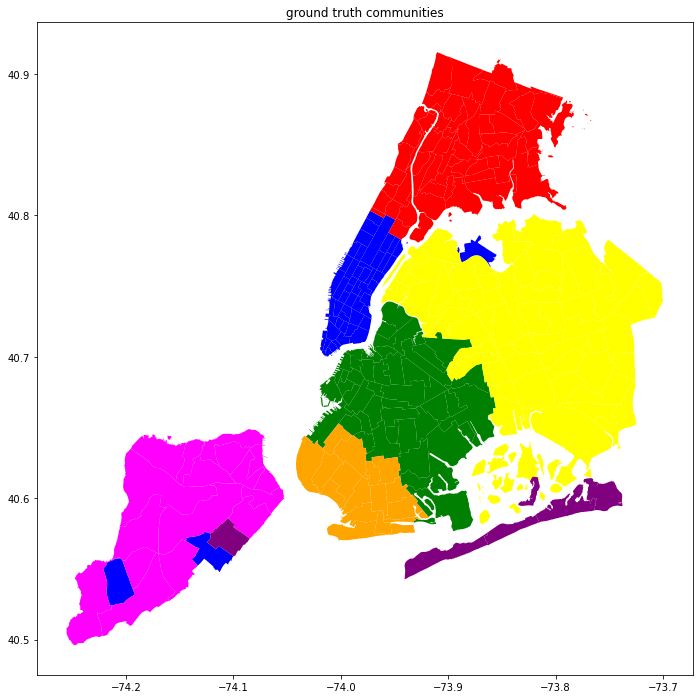

In [108]:
if True: #visualize partitions
    visualizePartitionShape(taxi_zip, resGt_weekend[0], 'location_id', plttitle = 'ground truth communities')

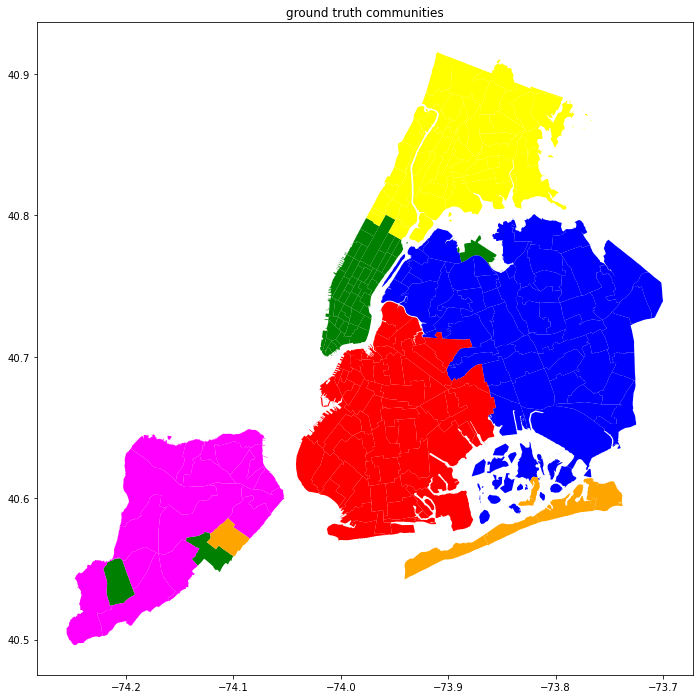

In [109]:
if True: #visualize partitions
    visualizePartitionShape(taxi_zip, resGt_weekday[0], 'location_id', plttitle = 'ground truth communities')